In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#### Getting the data of 4 different patients to get the completle analysis done and see the difference 

In [2]:
# Getting the data :
df1=pd.read_csv('C:/Users/shantam.bhuraria@lilly.com/Desktop/cpmp_hourly_compliance_files/14677.csv')
df2=pd.read_csv('C:/Users/shantam.bhuraria@lilly.com/Desktop/cpmp_hourly_compliance_files/14001.csv')
df3=pd.read_csv('C:/Users/shantam.bhuraria@lilly.com/Desktop/cpmp_hourly_compliance_files/14487.csv')
df4=pd.read_csv('C:/Users/shantam.bhuraria@lilly.com/Desktop/cpmp_hourly_compliance_files/14899.csv')
df1=df1.sort_values(by=['visit','local_date','hour'],inplace=False)
df2=df2.sort_values(by=['visit','local_date','hour'],inplace=False)
df3=df3.sort_values(by=['visit','local_date','hour'],inplace=False)
df4=df4.sort_values(by=['visit','local_date','hour'],inplace=False)


In [4]:
df1

,Unnamed: 0,subject,visit,local_date,hour,site_id,compliant_min,not_recording_min,isa,trial_day,id
9,192293,14677,Visit 2,2023-02-21,0.0,142,0,60,NP05,1,2023-02-21_0.014677
12,192296,14677,Visit 2,2023-02-21,1.0,142,0,60,NP05,1,2023-02-21_1.014677
11,192295,14677,Visit 2,2023-02-21,2.0,142,0,60,NP05,1,2023-02-21_2.014677
14,192298,14677,Visit 2,2023-02-21,3.0,142,0,60,NP05,1,2023-02-21_3.014677
17,192301,14677,Visit 2,2023-02-21,4.0,142,0,60,NP05,1,2023-02-21_4.014677
...,...,...,...,...,...,...,...,...,...,...,...
1371,193655,14677,Visit 4,2023-05-11,15.0,142,0,60,NP05,67,2023-05-11_15.014677
1370,193654,14677,Visit 4,2023-05-11,16.0,142,0,60,NP05,67,2023-05-11_16.014677
1369,193653,14677,Visit 4,2023-05-11,17.0,142,0,60,NP05,67,2023-05-11_17.014677
1385,193669,14677,Visit 4,2023-05-11,18.0,142,0,60,NP05,67,2023-05-11_18.014677


In [5]:
df1=df1[['visit','local_date','hour','compliant_min']]
df2=df2[['visit','local_date','hour','compliant_min']]
df3=df3[['visit','local_date','hour','compliant_min']]
df4=df4[['visit','local_date','hour','compliant_min']]

In [6]:
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)
df4 = df4.reset_index(drop=True)

In [7]:
# Convert 'local_date' column to datetime type
df1['local_date'] = pd.to_datetime(df1['local_date'])

df2['local_date'] = pd.to_datetime(df2['local_date'])

df3['local_date'] = pd.to_datetime(df3['local_date'])

df4['local_date'] = pd.to_datetime(df4['local_date'])

In [8]:
# List of data frames
dfs = [df1, df2, df3, df4]

# Perform operations on each data frame
for i, df in enumerate(dfs):
    # Group the dataframe by 'visit' and 'local_date' columns
    grouped = df.groupby(['visit', 'local_date'])
    
    # Calculate the average compliant time for each group
    avg_compliant_time = grouped['compliant_min'].mean()
    
    # Create a new data frame with the average compliant time
    result_df = pd.DataFrame(avg_compliant_time).reset_index()
    result_df.rename(columns={'compliant_min': 'avg_compliant_time'}, inplace=True)
    
    # Store the result in a new variable with the same name
    globals()[f'df_result{i+1}'] = result_df

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans

### Visualising the data individually for different Patients 

#### Patient 1 

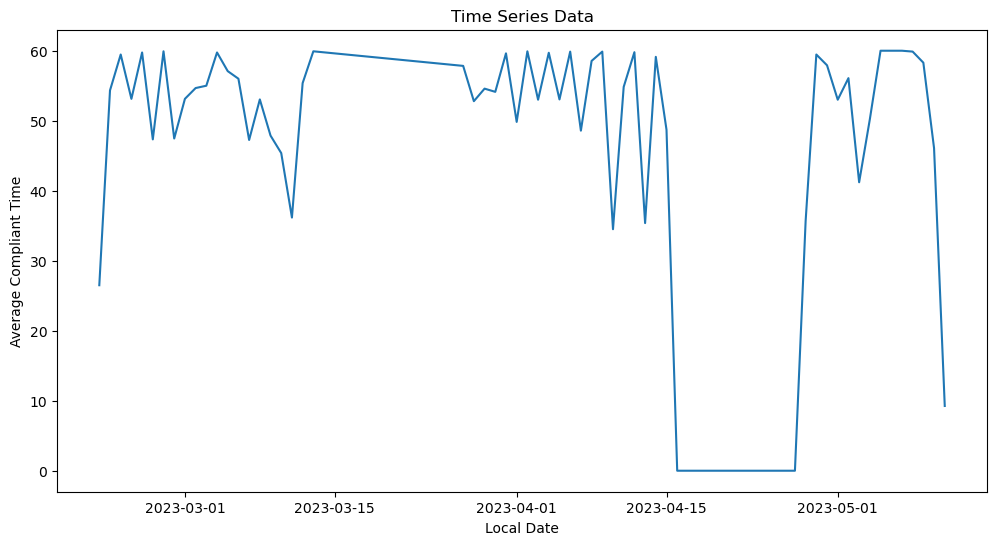

In [10]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df_result1['local_date'], df_result1['avg_compliant_time'])
plt.title('Time Series Data')
plt.xlabel('Local Date')
plt.ylabel('Average Compliant Time')
plt.show()

In [11]:
# Seasonal decomposition
result = seasonal_decompose(df_result1['avg_compliant_time'], model='additive', period=7)

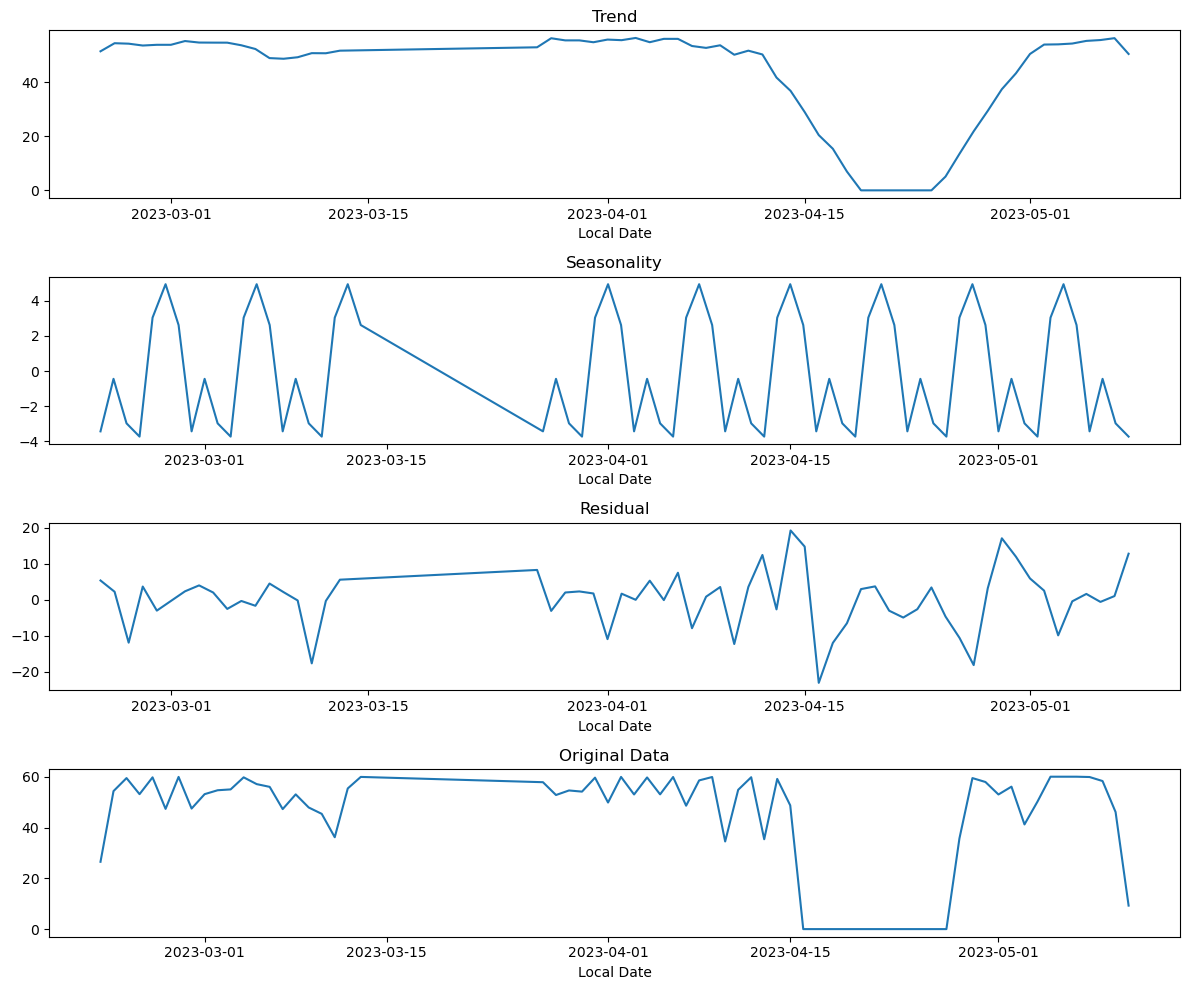

In [12]:
# Plotting the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(df_result1['local_date'], result.trend)
plt.title('Trend')
plt.xlabel('Local Date')

plt.subplot(4, 1, 2)
plt.plot(df_result1['local_date'], result.seasonal)
plt.title('Seasonality')
plt.xlabel('Local Date')

plt.subplot(4, 1, 3)
plt.plot(df_result1['local_date'], result.resid)
plt.title('Residual')
plt.xlabel('Local Date')

plt.subplot(4, 1, 4)
plt.plot(df_result1['local_date'], df_result1['avg_compliant_time'])
plt.title('Original Data')
plt.xlabel('Local Date')

plt.tight_layout()
plt.show()


In [ ]:
df_result1

In [ ]:
# Sort the dataframe by 'local_date'
df = df_result1.sort_values('local_date')

# Calculate the trend of 'avg_compliant_time' column
trend = None
if df['avg_compliant_time'].is_monotonic_increasing:
    trend = 'positive'
    trend_dates = (df['local_date'].min().strftime('%Y-%m-%d'), df['local_date'].max().strftime('%Y-%m-%d'))
elif df['avg_compliant_time'].is_monotonic_decreasing:
    trend = 'negative'
    trend_dates = (df['local_date'].min().strftime('%Y-%m-%d'), df['local_date'].max().strftime('%Y-%m-%d'))
else:
    trend = 'consistent'
    trend_dates = None

# Get the maximum and minimum values of 'avg_compliant_time'
max_value = df['avg_compliant_time'].max()
min_value = df['avg_compliant_time'].min()

# Calculate differences between consecutive values
df['diff'] = df['avg_compliant_time'].diff()

# Identify significant dates for increase, decrease, and consistency
increase_dates = df.loc[df['diff'] > 0, 'local_date']
decrease_dates = df.loc[df['diff'] < 0, 'local_date']
consistent_dates = df.loc[df['diff'] == 0, 'local_date']
consistent_value = df.loc[df['diff'] == 0, 'avg_compliant_time'].unique()[0]

# Identify drops and spikes
significant_drops = df.loc[df['diff'] < -10]
significant_spikes = df.loc[df['diff'] > 10]

# Generate the statement
statement = f"The overall trend is {trend}.\n"

if trend == 'positive':
    statement += f" The trend is positive from {trend_dates[0]} to {trend_dates[1]}.\n"
elif trend == 'negative':
    statement += f" The trend is negative from {trend_dates[0]} to {trend_dates[1]}.\n"
else:
    statement += " The trend is consistent.\n"

if not consistent_dates.empty:
    consistent_dates_str = consistent_dates.dt.strftime('%Y-%m-%d').to_list()
    statement += f" The trend is consistent on the following dates: {', '.join(consistent_dates_str)} with a value of {consistent_value}.\n"

if not significant_drops.empty:
    drop_dates = significant_drops['local_date'].dt.strftime('%Y-%m-%d').to_list()
    statement += f" There are significant drops in avg_compliant_time on {', '.join(drop_dates)}.\n"
if not significant_spikes.empty:
    spike_dates = significant_spikes['local_date'].dt.strftime('%Y-%m-%d').to_list()
    statement += f" There are significant spikes in avg_compliant_time on {', '.join(spike_dates)}.\n"

# Print the statement
print(statement)

# Plotting the trend
plt.plot(df['local_date'], df['avg_compliant_time'])
plt.xlabel('Date')
plt.ylabel('Average Compliant Time')
plt.title('Trend of Average Compliant Time')

# Marking significant dates
if not increase_dates.empty:
    plt.scatter(increase_dates, df.loc[increase_dates.index, 'avg_compliant_time'], color='green', label='Increase')
if not decrease_dates.empty:
    plt.scatter(decrease_dates, df.loc[decrease_dates.index, 'avg_compliant_time'], color='red', label='Decrease')
if not consistent_dates.empty:
    plt.scatter(consistent_dates, df.loc[consistent_dates.index, 'avg_compliant_time'], color='blue', label='Consistent')

plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Sort the dataframe by 'local_date'
df = df_result1.sort_values('local_date')

# Determine the window size
window_size =8

# Calculate the number of windows
num_windows = len(df) // window_size

# Analyze trends and generate statements for each window
window_statements = []
for i in range(num_windows):
    # Calculate the window start and end indexes
    window_start = i * window_size
    window_end = (i + 1) * window_size - 1

    # Adjust the window end index if it exceeds the available data points
    if window_end >= len(df):
        window_end = len(df) - 1

    # Perform trend analysis on the window
    window = df.iloc[window_start:window_end + 1]
    if window['avg_compliant_time'].is_monotonic_increasing:
        trend = 'positive'
    elif window['avg_compliant_time'].is_monotonic_decreasing:
        trend = 'negative'
    else:
        trend = 'consistent'

    # Get the maximum and minimum values of 'avg_compliant_time'
    max_value = window['avg_compliant_time'].max()
    min_value = window['avg_compliant_time'].min()

    # Generate the statement for the window
    window_statement = f"The trend analysis for the window of {window_start}-{window_end} dates is as follows:\n"
    window_statement += f" The trend is {trend}.\n"
    window_statement += f" The maximum value of avg_compliant_time is {max_value} and the minimum value is {min_value}.\n"

    window_statements.append(window_statement)

    # Print the window statement
    print(window_statement)
    print("-" * 50)

# Plotting the trend
plt.plot(df['local_date'], df['avg_compliant_time'])
plt.xlabel('Date')
plt.ylabel('Average Compliant Time')
plt.title('Trend of Average Compliant Time')

# Highlighting the window ranges
for i in range(num_windows):
    window_start = i * window_size
    window_end = (i + 1) * window_size - 1

    # Adjust the window end index if it exceeds the available data points
    if window_end >= len(df):
        window_end = len(df) - 1

    plt.axvspan(df.iloc[window_start]['local_date'], df.iloc[window_end]['local_date'], alpha=0.3, color='yellow')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()
